## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML,display
import seaborn as sns

## Import Data
### File descriptions
- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms
### Data fields
- Here's a brief version of what you'll find in the data description file.
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Import Data

In [2]:
train_df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")
ntrain = train_df.shape[0]

In [3]:
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

## Get Infomation of columns:

In [4]:
def columns_information(data):
    columns_information = {}
    num_values = len(data)
    for col in data.columns:
        num_unique = data[col].nunique()
        num_nulls = data[col].isna().sum()/num_values
        d_types = data[col].dtypes
        if (num_unique<30):
            info_str = '['
            values_count = data[col].value_counts()
            single_values_weight = round(values_count.iloc[0]/num_values,2)
            for index,value in values_count.items():
                info_str += f"{index} * {value}, "
                columns_information[col] = {"d_type" : d_types,"Type" : "Discret", "percentage of null":num_nulls,"single_value_weight" : single_values_weight,"min" : 0.0,
                                            "max" : 0.0,"median" : 0.0,"mean" : 0.0,"info_str": info_str[:-2] + "]"}
        else:
            if d_types == "int64" or d_types == "float64":
                columns_information[col] = {"d_type" : d_types,"Type" : "Continuous","percentage of null":num_nulls,"min" : train_df[col].min(),
                                        "max" : train_df[col].max(),"median" : train_df[col].median(),"mean" : train_df[col].mean(),"info_str":  ""}
    info_df = pd.DataFrame.from_dict(columns_information,orient='index')
    return info_df

info_df = columns_information(all_data)

In [5]:
display(HTML(info_df[info_df['Type']=="Discret"][['d_type','percentage of null','info_str','single_value_weight']].to_html()))

,d_type,percentage of null,info_str,single_value_weight
MSSubClass,int64,0.000000,"[20 * 1079, 60 * 575, 50 * 287, 120 * 182, 30 * 139, 160 * 128, 70 * 128, 80 * 118, 90 * 109, 190 * 61, 85 * 48, 75 * 23, 45 * 18, 180 * 17, 40 * 6, 150 * 1]",0.37
MSZoning,object,0.001370,"[RL * 2265, RM * 460, FV * 139, RH * 26, C (all) * 25]",0.78
Street,object,0.000000,"[Pave * 2907, Grvl * 12]",1.00
Alley,object,0.932169,"[Grvl * 120, Pave * 78]",0.04
LotShape,object,0.000000,"[Reg * 1859, IR1 * 968, IR2 * 76, IR3 * 16]",0.64
LandContour,object,0.000000,"[Lvl * 2622, HLS * 120, Bnk * 117, Low * 60]",0.90
Utilities,object,0.000685,"[AllPub * 2916, NoSeWa * 1]",1.00
LotConfig,object,0.000000,"[Inside * 2133, Corner * 511, CulDSac * 176, FR2 * 85, FR3 * 14]",0.73
LandSlope,object,0.000000,"[Gtl * 2778, Mod * 125, Sev * 16]",0.95
Neighborhood,object,0.000000,"[NAmes * 443, CollgCr * 267, OldTown * 239, Edwards * 194, Somerst * 182, NridgHt * 166, Gilbert * 165, Sawyer * 151, NWAmes * 131, SawyerW * 125, Mitchel * 114, BrkSide * 108, Crawfor * 103, IDOTRR * 93, Timber * 72, NoRidge * 71, StoneBr * 51, SWISU * 48, ClearCr * 44, MeadowV * 37, BrDale * 30, Blmngtn * 28, Veenker * 24, NPkVill * 23, Blueste * 10]",0.15


In [6]:
display(HTML(info_df[info_df['Type']=="Continuous"][['d_type','percentage of null','info_str','min','max','median','mean']].to_html()))



,d_type,percentage of null,info_str,min,max,median,mean
Id,int64,0.000000,,1.0,1460.0,730.5,730.500000
LotFrontage,float64,0.166495,,21.0,313.0,69.0,70.049958
LotArea,int64,0.000000,,1300.0,215245.0,9478.5,10516.828082
YearBuilt,int64,0.000000,,1872.0,2010.0,1973.0,1971.267808
YearRemodAdd,int64,0.000000,,1950.0,2010.0,1994.0,1984.865753
MasVnrArea,float64,0.007879,,0.0,1600.0,0.0,103.685262
BsmtFinSF1,float64,0.000343,,0.0,5644.0,383.5,443.639726
BsmtFinSF2,float64,0.000343,,0.0,1474.0,0.0,46.549315
BsmtUnfSF,float64,0.000343,,0.0,2336.0,477.5,567.240411
TotalBsmtSF,float64,0.000343,,0.0,6110.0,991.5,1057.429452


## Correlation of features

Text(0.5, 1.0, 'correlation of continuous column')

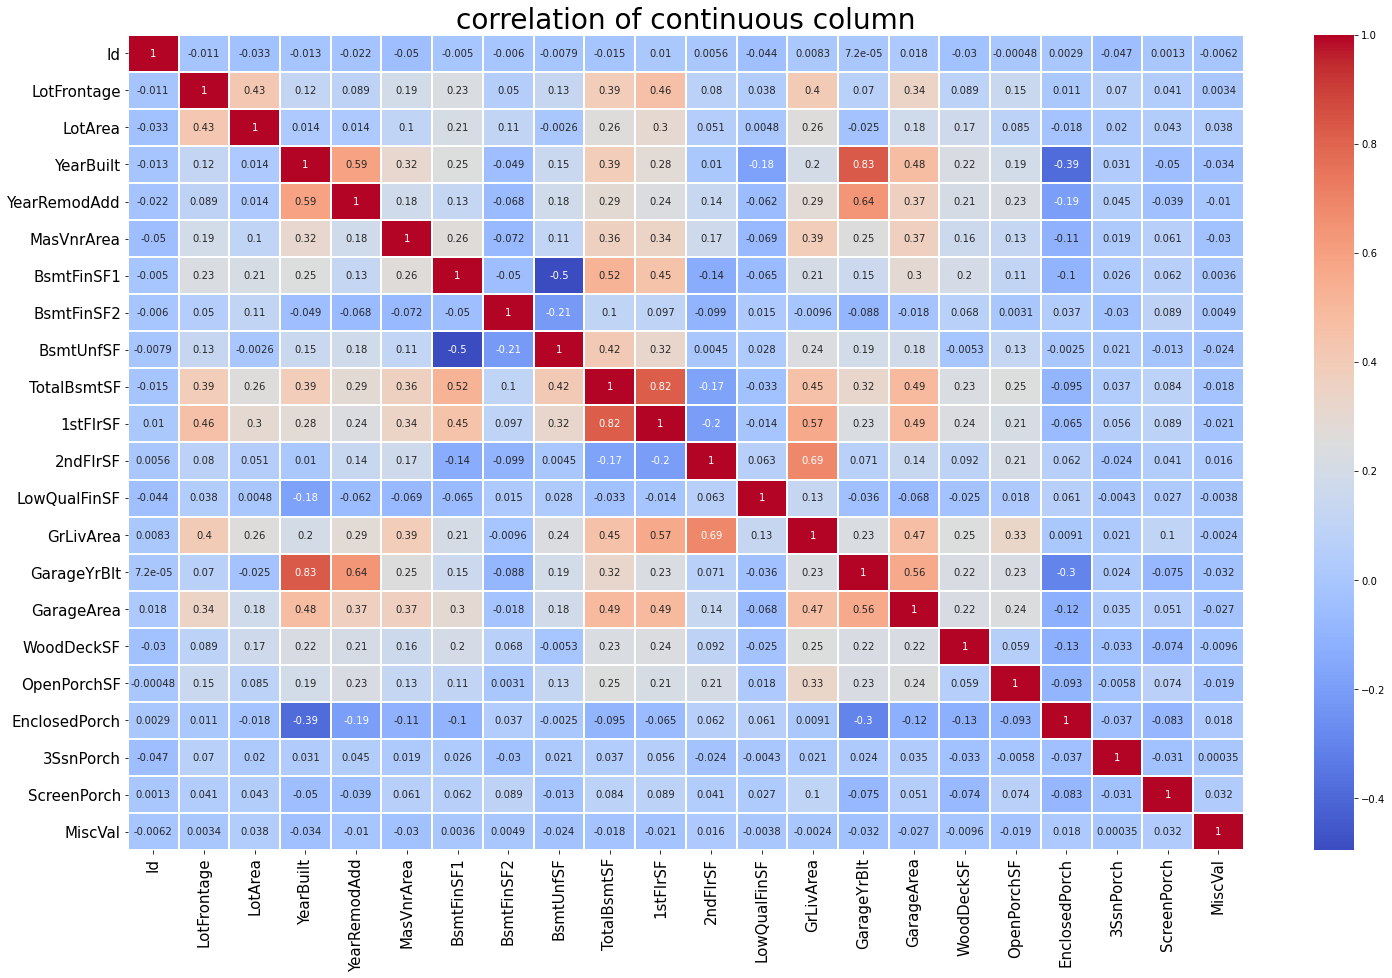

In [7]:
f,ax = plt.subplots(figsize = (25,15))
corr = train_df[info_df[info_df['Type']=='Continuous'].index].corr()
ax.tick_params(labelsize = 15)
sns.heatmap(corr,annot = True,cmap='coolwarm',linewidths=1).set_title("correlation of continuous column",fontsize = 28)




### Graphic of important features

Text(0.5, 0.98, 'Sale Price compared to GrLivArea, TotalBsmtSF,GarageArea')

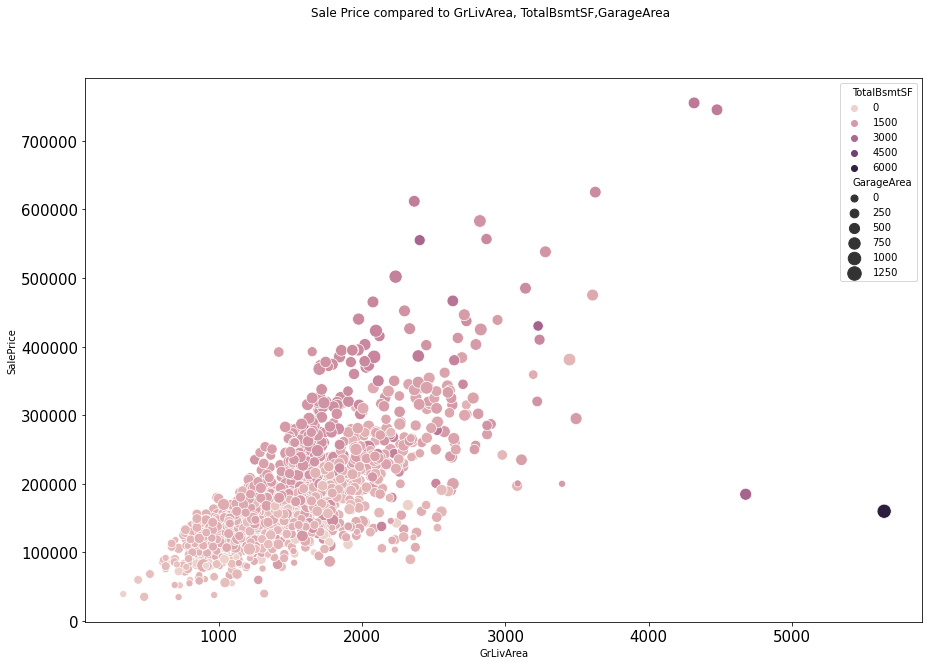

In [8]:
f,ax = plt.subplots(figsize = (15,10))
ax.tick_params(labelsize = 15)
sns.scatterplot(data=train_df,x="GrLivArea",y="SalePrice",hue="TotalBsmtSF",sizes = (50,200),size = "GarageArea")
f.suptitle("Sale Price compared to GrLivArea, TotalBsmtSF,GarageArea")


## Clean Function
Use Clean Function to delete and filling columns in dataset

In [9]:
def drop_single_value_weight_cols(data, weight, info):
    cols = info[(info["Type"]=='Discret')
                   & (info["single_value_weight"]>weight)].index
    print(f"dropped {', '.join(cols)} because of much single value weight")
    data.drop(cols, inplace=True,axis = 1)
    return data
def delete_missing_values(data,missing_value_percent,info):
    cols = info[info["percentage of null"] > missing_value_percent].index
    cols = [c for c in cols if c in data.columns]
    print(f"dropped {','.join(cols)} because of missing value")
    data.drop(cols,axis = 1,inplace=True)
    return data
def filling_na(data,info):
    cols = info[info["percentage of null"]>0].index
    cols = [c for c in cols if c in data.columns]
    for col in cols:
        if info['Type'][col] == 'Discret':
            most_frequent_value = data[col].value_counts().index[0]
            print(f"filling missingvalues in {col} with {most_frequent_value}...")
            data[col].fillna(most_frequent_value, inplace=True)
        if info['Type'][col] == 'Continuous':
            print(f"filling {col} with mean value {data[col].mean()}")
            data[col].fillna(data[col].mean(),inplace = True)
    return data
def cleaning(data,info,missing_value_percent=0.8,weight = 0.8 ):
    print("running cleaning")
    pipe_df = (data
               .pipe(delete_missing_values,missing_value_percent,info)
               .pipe(filling_na,info)
               .pipe(drop_single_value_weight_cols,weight,info))
    print("Done")
    return pipe_df


In [10]:
clean_df = cleaning(all_data,info_df)

running cleaning
dropped Alley,PoolQC,Fence,MiscFeature because of missing value
filling missingvalues in MSZoning with RL...
filling LotFrontage with mean value 69.30579531442663
filling missingvalues in Utilities with AllPub...
filling missingvalues in Exterior1st with VinylSd...
filling missingvalues in Exterior2nd with VinylSd...
filling missingvalues in MasVnrType with None...
filling MasVnrArea with mean value 102.20131215469613
filling missingvalues in BsmtQual with TA...
filling missingvalues in BsmtCond with TA...
filling missingvalues in BsmtExposure with No...
filling missingvalues in BsmtFinType1 with Unf...
filling BsmtFinSF1 with mean value 441.4232350925291
filling missingvalues in BsmtFinType2 with Unf...
filling BsmtFinSF2 with mean value 49.58224811514736
filling BsmtUnfSF with mean value 560.7721041809458
filling TotalBsmtSF with mean value 1051.7775873886224
filling missingvalues in Electrical with SBrkr...
filling missingvalues in BsmtFullBath with 0.0...
filling m

## Training model


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [12]:
num = []
cat = []
for label,content in clean_df.items():
    if pd.api.types.is_numeric_dtype(content):
        num.append(label)
    else:
        cat.append(label)
col_trans = ColumnTransformer(
        [("minmax",MinMaxScaler(),num),
         ("onehot",OneHotEncoder(),cat)]
    )


In [13]:
clean_df = col_trans.fit_transform(clean_df)

In [14]:
X = clean_df[:ntrain]
y = train_df['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
model = {"LR":LinearRegression(),
         "RandomForestRG":RandomForestRegressor(random_state=42),
         "GradientBoostingRG":GradientBoostingRegressor(random_state=42),
         }
for a,b in model.items():
    b.fit(X_train,y_train)
    print(f"Score for {a} on train data : {b.score(X_train,y_train)}")
    print(f"Score for {a} on test data : {b.score(X_test,y_test)}")


Score for LR on train data : 0.8849371265503361
Score for LR on test data : 0.8715163311771044
Score for RandomForestRG on train data : 0.9790559451711466
Score for RandomForestRG on test data : 0.8909209330222374
Score for GradientBoostingRG on train data : 0.968371850223583
Score for GradientBoostingRG on test data : 0.9065394515843223


## First Submisstion

In [16]:
GBR = GradientBoostingRegressor(random_state=42).fit(X_train,y_train)
predictions = GBR.predict(clean_df[ntrain:])
submission = pd.DataFrame(columns=['Id', 'SalePrice'])
submission['Id'] = test_df['Id']
submission['SalePrice'] = predictions
submission.to_csv('submission.csv', index=False)

